<a href="https://colab.research.google.com/github/jsathish1990/ChatGPT_time_series/blob/main/Time_series_analysis_Prompt_engineering_GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/bobnau/daily-website-visitors

*Prompt :*

**Write python code that generates a line plot given a dataframe with Date and Unique.Visits**

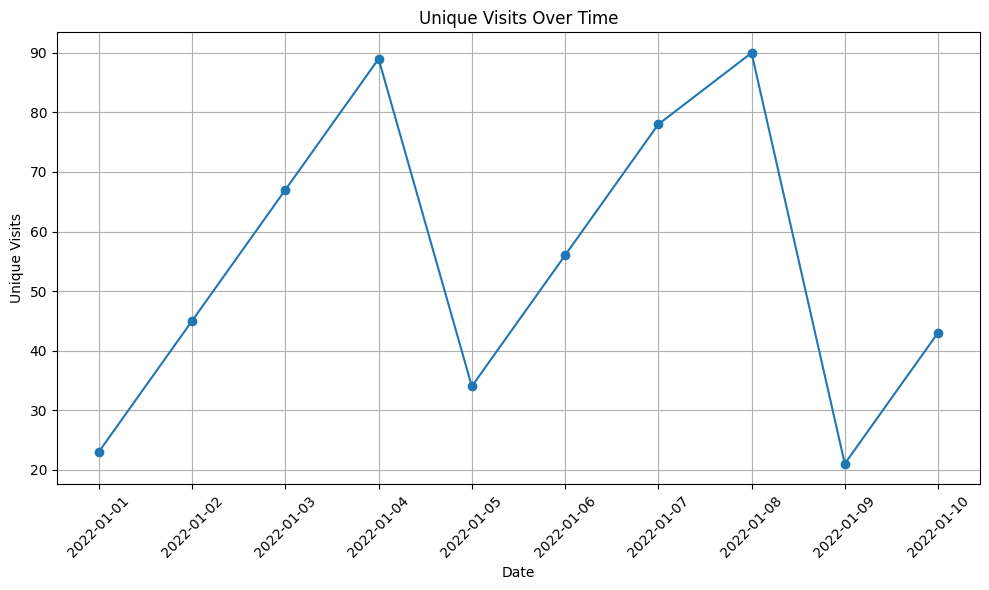

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataframe creation
data = {
    'Date':pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Unique_Visits': [23, 45, 67, 89, 34, 56, 78, 90, 21, 43]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Unique_Visits'], marker='o')
plt.title('Unique Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Unique Visits')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Prompt :*

**Write python code that generates a scatter plot given a previously defined dataframe called df with Date and Unique.Visits column. Please pay attention to '.' in the Unique.Visits column. Please generate the plot using Plotly. .**

In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
# Mounting Google Drive to access files in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/data_1.csv', thousands=',')

In [5]:
df_t = df[['Date','Unique.Visits']]

In [6]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236


In [7]:
import plotly.express as px

# Assuming the dataframe 'df' is already defined with 'Date' and 'Unique.Visits' columns
# Here is the Python code to generate a scatter plot using Plotly

# Scatter plot using Plotly
fig = px.scatter(df, x='Date', y='Unique.Visits', title='Unique Visits Over Time')
fig.show()

**Key Takeaways**

1. Column names need to be clearly specified. Otherwise, ChatGPT will define a generic column name.

2. Stating clearly the prescence of
'.' in the column name is required.

3. Concisely stating the specifics in a prompt is crucial. Example : Mentioning the name of the library for visualization.


*Prompt:*


**Write python code for a Prophet time series model given the dataframe df_t which contains Date and Unique.Visits columns.
Please pay attention to '.' in the Unique.Visits column.
Make sure to split the data for training and test sets.
Visualize training set data, test set data and predictions from the Prophet model with the confidence interval using Plotly. Carefully plot the data over the forecast generated by Prophet.
Assume that Prophet library has been imported in the Google Colab environment as**
```
from prophet import Prophet

```

In [8]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objs as go

# Assuming df_t is already defined with 'Date' and 'Unique.Visits' columns

# Rename columns as required by Prophet
df_prophet= df_t.rename(columns={'Date':'ds', 'Unique.Visits':'y'})

# Split the data into training and test sets
split_ratio = 0.8
split_index= int(split_ratio * len(df_prophet))
train_df = df_prophet.iloc[:split_index]
test_df = df_prophet.iloc[split_index:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_df)

# Make future dataframe for predictions
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

# Plotting using Plotly
fig = go.Figure()

# Add forecast data
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat'],
    name='Forecast', mode='lines', line=dict(color='red')))

# Add confidence interval
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'],
    name='Upper Confidence Interval', mode='lines', fill=None, line=dict(color='gray')))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'],
    name='Lower Confidence Interval', mode='lines', fill='tonexty', line=dict(color='gray')))

# Add training data
fig.add_trace(go.Scatter(
    x=train_df['ds'], y=train_df['y'],
    name='Training Data', mode='markers', marker=dict(color='blue')))


# Add test data
fig.add_trace(go.Scatter(
    x=test_df['ds'], y=test_df['y'],
    name='Test Data', mode='markers', marker=dict(color='orange')))

# Update plot layout
fig.update_layout(title='Prophet Forecast with Training and Test Data',
                  xaxis_title='Date', yaxis_title='Unique Visits',
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Show the plot
fig.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpso18ok3f/yjw30l5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpso18ok3f/ck33hgh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95954', 'data', 'file=/tmp/tmpso18ok3f/yjw30l5a.json', 'init=/tmp/tmpso18ok3f/ck33hgh0.json', 'output', 'file=/tmp/tmpso18ok3f/prophet_model9jct3nu1/prophet_model-20240318120444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
